<table class="table table-bordered">
    <tr>
<!--         <th style="text-align:center; width:30%"><img src='https://drive.google.com/uc?export=view&id=1iEILhi-REsl4vk6cfd7yhNiTrAB-RVat' style="width: 100px; height: 80px; "></th> -->
        <th style="text-align:center;"><h3>Final Year Proect</h3><h3>Google Reviews Topic Modelling</h3><h4>LDA</h4></th>
    </tr>
</table>

In [1]:
# import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
# os.chdir('./')

### 1. Reading the data and basic EDA

In [2]:
# Write your code below

# Solution
reviews = pd.read_csv (r'C:\Users\alext\OneDrive - Singapore Management University\Desktop\SMU General Shit\Y4S2 (FYP)\Project_2_SgCarMart Price Prediction\CarPricePrediction\Sentiment & Topic Modelling\getgo_reviews.csv')


In [3]:
display(reviews)

,Rating,Review Text,Review Date
0,5 stars,A great car sharing with many types of cars,a month ago
1,5 stars,GetGo always there when I need it. Very conven...,a month ago
2,5 stars,One of the best Car-Sharing company that I hav...,2 months ago
3,5 stars,Very convenient and easy rental with Getgo car...,a month ago
4,1 star,As a frequent GetGo customer,a month ago
...,...,...,...
945,5 stars,Plenty of cars to choose from nearby my area. ...,a month ago
946,5 stars,Convenience,a month ago
947,5 stars,I like the convenience of having at least one ...,2 years ago
948,5 stars,Renting is simple,2 months ago


In [4]:
reviews['Rating'] = reviews['Rating'].str[0]

# Convert 'Rating' column to numeric
reviews['Rating'] = pd.to_numeric(reviews['Rating'])

# Filter reviews with rating 4 stars or above
reviews_1star = reviews[reviews['Rating'] >= 4.0]


In [5]:
reviews.columns

Index(['Rating', 'Review Text', 'Review Date'], dtype='object')

In [6]:
#reviewRating is omitted
# Print out the first rows of papers
display(reviews_1star)

,Rating,Review Text,Review Date
0,5,A great car sharing with many types of cars,a month ago
1,5,GetGo always there when I need it. Very conven...,a month ago
2,5,One of the best Car-Sharing company that I hav...,2 months ago
3,5,Very convenient and easy rental with Getgo car...,a month ago
5,4,I was thrilled to drive an EV Hyundai Kona nea...,a month ago
...,...,...,...
943,5,good app for car sharing. responsive support t...,a month ago
945,5,Plenty of cars to choose from nearby my area. ...,a month ago
946,5,Convenience,a month ago
947,5,I like the convenience of having at least one ...,2 years ago


In [7]:
reviews_cleaned = reviews_1star.dropna()
display(reviews_cleaned)

,Rating,Review Text,Review Date
0,5,A great car sharing with many types of cars,a month ago
1,5,GetGo always there when I need it. Very conven...,a month ago
2,5,One of the best Car-Sharing company that I hav...,2 months ago
3,5,Very convenient and easy rental with Getgo car...,a month ago
5,4,I was thrilled to drive an EV Hyundai Kona nea...,a month ago
...,...,...,...
943,5,good app for car sharing. responsive support t...,a month ago
945,5,Plenty of cars to choose from nearby my area. ...,a month ago
946,5,Convenience,a month ago
947,5,I like the convenience of having at least one ...,2 years ago


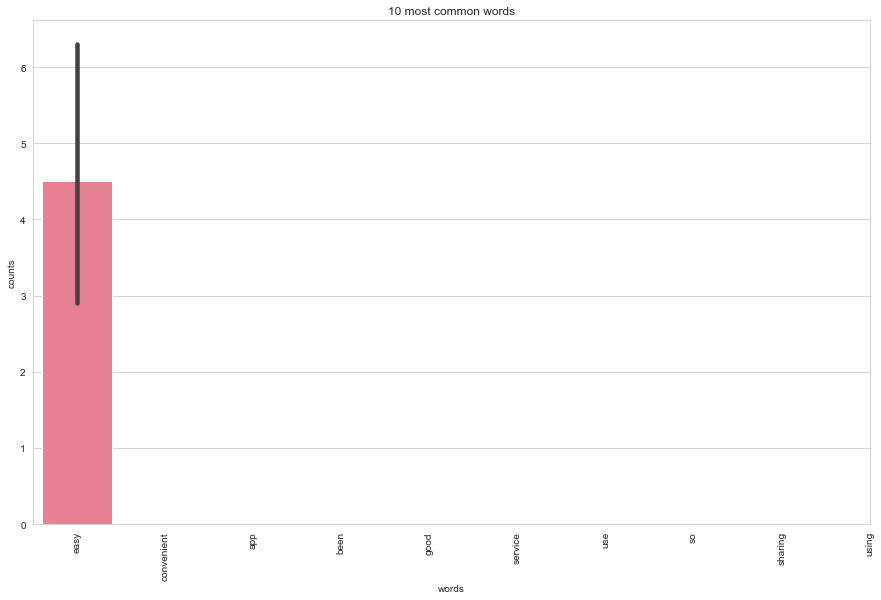

In [8]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names_out()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words=['getgo', 'like','stars','people','experience','let','english','however','then','stuff','only','or','very','than','also','singapore','could','would','an','asked','one','enough','u','just','has','on','were','hobby','thing','that','here','then','when','their','there','need','store','products','cars','all','rc','models','it','car','model','product','with','is','as','was','what','be','other','have','this','a','in','no','too','you','the','my', 'they', 'if', 'at', 'me', 'your', 'of', 'are', 'for', 'can', 'shop', 'not', 'i', 'get', 'but', 'to', 'and', 'from', 'tamiya', 'item', 'place', 'paint', 'really', 'quite', 'come', 'got', 'will', 'staff', 'even', 'still', 'play', 'tell', 'got', 'absolutely'])

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(reviews_cleaned['Review Text'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [9]:
# Load the regular expression library
import re

# Remove punctuation
reviews_cleaned['reviews_cleaned_text_processed'] = \
reviews_cleaned['Review Text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
reviews_cleaned['reviews_cleaned_text_processed'] = \
reviews_cleaned['reviews_cleaned_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
reviews_cleaned['reviews_cleaned_text_processed'].head()

0          a great car sharing with many types of cars
1    getgo always there when i need it very conveni...
2    one of the best car-sharing company that i hav...
3    very convenient and easy rental with getgo car...
5    i was thrilled to drive an ev hyundai kona nea...
Name: reviews_cleaned_text_processed, dtype: object

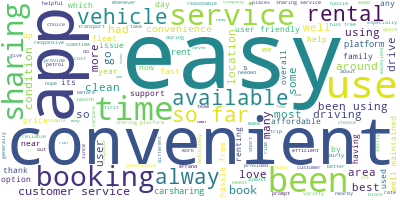

In [10]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(reviews_cleaned['reviews_cleaned_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(stopwords=['getgo', 'great', 'good', 'recommend','staffs','parts','kits','like','stars','people','experience','let','english', 'however','then','stuff','only','or','very','than','also','singapore','could','would','an','asked','one','enough','u','just','has','on','were','hobby','thing','that','here','then','when','their','there','need','store','products','cars','all','rc','models','it','car','model','product','with','is','as','was','what','be','other','have','this','a','in','no','too','you','the','my', 'they', 'if', 'at', 'me', 'your', 'of', 'are', 'for', 'can', 'shop', 'not', 'i', 'get', 'but', 'to', 'and', 'from', 'tamiya', 'item', 'place', 'paint', 'really', 'quite', 'come', 'got', 'will', 'staff', 'even', 'still', 'play', 'tell', 'got', 'absolutely'],background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [11]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['like','stars','people','experience','let','english', 'however','then','stuff','only','or','very','than','also','singapore','could','would','an','asked','one','enough','u','just','has','on','were','hobby','thing','that','here','then','when','their','there','need','store','products','cars','all','rc','models','it','car','model','product','with','is','as','was','what','be','other','have','this','a','in','no','too','you','the','my', 'they', 'if', 'at', 'me', 'your', 'of', 'are', 'for', 'can', 'shop', 'not', 'i', 'get', 'but', 'to', 'and', 'from', 'tamiya', 'item', 'place', 'paint', 'really', 'quite', 'come', 'got', 'will', 'staff', 'even', 'still', 'play', 'tell', 'got', 'absolutely'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = reviews_cleaned.reviews_cleaned_text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alext\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['great', 'sharing', 'many', 'types']


In [12]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1)]


In [13]:
from pprint import pprint
# number of topics
num_topics = 3
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.044*"getgo" + 0.032*"convenient" + 0.015*"easy" + 0.015*"use" + '
  '0.014*"good" + 0.014*"using" + 0.013*"great" + 0.011*"service" + '
  '0.009*"app" + 0.008*"sharing"'),
 (1,
  '0.050*"getgo" + 0.023*"app" + 0.021*"easy" + 0.019*"service" + 0.017*"use" '
  '+ 0.017*"good" + 0.012*"sharing" + 0.012*"using" + 0.010*"customer" + '
  '0.010*"convenient"'),
 (2,
  '0.023*"getgo" + 0.016*"sharing" + 0.016*"good" + 0.015*"easy" + '
  '0.014*"service" + 0.012*"far" + 0.011*"app" + 0.011*"clean" + '
  '0.010*"available" + 0.009*"drive"')]


In [14]:
import pickle 
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, R=7)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.014722 -0.038585       1        1  47.575137
0     -0.034178  0.029549       2        1  34.603640
2      0.048899  0.009036       3        1  17.821223, topic_info=           Term        Freq       Total Category  logprob  loglift
5    convenient  147.000000  147.000000  Default   7.0000   7.0000
160       clean   44.000000   44.000000  Default   6.0000   6.0000
2       sharing  100.000000  100.000000  Default   5.0000   5.0000
30        drive   38.000000   38.000000  Default   4.0000   4.0000
10          far   70.000000   70.000000  Default   3.0000   3.0000
..          ...         ...         ...      ...      ...      ...
37         good   24.797754  136.461612   Topic3  -4.1313   0.0195
6         getgo   35.988450  370.553468   Topic3  -3.7588  -0.6070
14         easy   23.415457  155.845846   Topic3  -4.1886  -0.1707
64      service   21.372491  131.234747   Topic3  -4.2799  -0.0901
62          app   17.471856  139.041496   Topic3  -4.4814  -0.3494

[71 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
62        1  0.668865        app
62        2  0.201379        app
62        3  0.122266        app
118       1  0.476981  available
118       2  0.286189  available
...     ...       ...        ...
214       2  0.607044   vehicles
214       3  0.091057   vehicles
92        1  0.170101      worry
92        2  0.850505      worry
92        3  0.170101      worry

[122 rows x 3 columns], R=7, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])